# SUPERVISED MACHINE LEARNING TO PREDICT SCORES OF STUDENTS

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Getting the data and visulaizing it with plots

In [2]:
sheetID = "1bAgbkqLbuCW_253cFHrGbqm6WOqpGENMTuA9QdsSwhE"
data = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{sheetID}/export?format=csv")
print("Data imported successfully")

Data imported successfully


In [3]:
data.head(100)

,Year,TPT
0,1,8.14
1,2,7.41
2,3,6.69
3,4,6.37
4,5,5.88
5,6,5.70
6,7,5.81
7,8,5.50
8,9,5.33
9,10,5.13


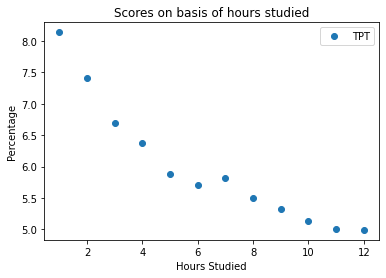

In [4]:
data.plot(x="Year",y="TPT",style="o")
plt.title("Scores on basis of hours studied")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage")
plt.show()

No outliers present. We can proceed further

# Splitting data into test and train set

In [5]:
x=data.iloc[:, :-1].values
y=data.iloc[:, 1].values

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0)

# Training the model

In [7]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

print("Training complete.")

Training complete.


# Visualizing and plotting the model

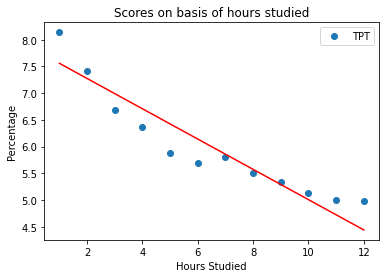

In [8]:
line = regressor.coef_*x+regressor.intercept_
data.plot(x="Year",y="TPT",style="o")
plt.title("Scores on basis of hours studied")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage")
plt.plot(x, line , color='red');
plt.show()

In [9]:
print(x_test)
y_pred = regressor.predict(x_test)

[[ 7]
 [12]
 [ 5]]


# Comparing the original and the predicted scores

In [10]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,5.81,5.858981
1,4.99,4.442778
2,5.88,6.425463


# Calculating the errors

In [11]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('r2 score error:' , r2_score(y_test, y_pred))

Mean Absolute Error: 0.38055555555555554
Mean Squared Error: 0.1997937299954277
r2 score error: -0.22372639850200837


# Predicted score for a student studying 9.25 hours/day

In [12]:
hours = float(input("How many hours ?"))
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 12.0
Predicted Score = 4.442777777777777


In [12]:
#https://www.belajarstatistics.com/blog/2021/07/06/contoh-soal-analisis-regresi-linear-sederhana/